In [20]:
import numpy as np
import cv2
import IPython
import math
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [25]:
def imshow2(img):
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

# CULane Dataset

In [ ]:
base = '../CULane/'
# name = base + 'driver_100_30frame/05250437_0296.MP4/02040'
name = base + 'driver_161_90frame/06030819_0755.MP4/00360'
img = cv2.imread(name+'.jpg')
orig = img.shape
scalar = 5
img = cv2.resize(img,(orig[1]*scalar,orig[0]*scalar))
line = open(name+'.lines.txt','r').read().split(' \n')[:-1]
line = np.array([[int(float(j)*scalar) for j in i.split()] for i in line])

In [ ]:
colors = [(255,0,0),(0,255,0),(0,0,255),(255,255,0),(255,0,255),(0,255,255)]
for i in range(line.shape[0]):
    c = colors[i]
    l = np.array(line[i]).reshape(-1,2)
    for j in range(1,l.shape[0]):
        p1 = (l[j-1][0],l[j-1][1])
        p2 = (l[j][0],l[j][1])
        cv2.line(img, p1, p2, c, 4*scalar)
img = cv2.resize(img,(orig[1],orig[0]))

In [ ]:
imshow(img)

---

# Openpilot test

In [4]:
from openpilot_tools.lib.logreader import LogReader
import numpy as np
import pickle

In [13]:
lr = LogReader('data/27/raw_log.bz2')
# Make list of logs
logs = list(lr)
# we print the types of the first 50 logs

In [14]:
calib = [i  for i in logs if i.which()=='liveCalibration']

In [93]:
calib[0]

<log.capnp:Event reader (logMonoTime = 180755827362971, liveCalibration = (calStatus = 1, calCycle = 0, calPerc = 100, extrinsicMatrix = [-0.036559243, 0.99933076, 0.0012052424, -0.0014462908, 0.043547109, 0.00038821032, 0.99905127, -1.1988616, -0.99838221, -0.036577046, 0.043532159, -0.052238591], warpMatrix2 = [1.2499999, 0.00048558784, 418.81006, -0.00048558784, 1.2499999, 371.35196, 0, 0, 1]), valid = true)>

In [3]:
model = [i  for i in logs if i.which()=='model']

In [10]:
model[0]

<log.capnp:Event reader (logMonoTime = 584635679171351, model = (frameId = 40790, path = (points = [-0.00070698187, -0.0032113818, -0.0079574576, -0.01000546, -0.014377723, -0.022130951, -0.031132882, -0.042435352, -0.057665609, -0.073549166, -0.089424588, -0.10871357, -0.13113543, -0.15325572, -0.17719232, -0.20064095, -0.22504827, -0.25296018, -0.2835772, -0.31337202, -0.34727749, -0.37930158, -0.41501075, -0.45388103, -0.48905271, -0.52838933, -0.56589884, -0.60751688, -0.65204442, -0.69812691, -0.74923, -0.79745549, -0.85060948, -0.89951289, -0.95405179, -1.0106287, -1.0670012, -1.1227777, -1.177487, -1.2294837, -1.2895828, -1.3502338, -1.4149399, -1.4755121, -1.5411183, -1.6050487, -1.6804147, -1.746031, -1.8148087, -1.8841695], prob = 1, std = 0.20736955), leftLane = (points = [2.1304047, 2.1216707, 2.1119933, 2.1030374, 2.0915229, 2.0774977, 2.0651453, 2.0553739, 2.0401163, 2.0206845, 2.0030124, 1.982383, 1.9632357, 1.9367449, 1.9135157, 1.8863212, 1.8597159, 1.8297018, 1.803563

In [ ]:
class Pts():
    class lane():
        def __init__(self,p,s):
            self.points = p
            self.std = s
    def __init__(self,pp,lp,rp,ps,ls,rs):
        self.path = self.lane(pp,ps)
        self.leftLane = self.lane(lp,ls)
        self.rightLane = self.lane(rp,rs)
    
for i in range(500):
    

In [38]:
np.array(model[0].model.path.points)

array([-4.00972349e-04,  5.18397537e-05, -7.28326850e-04, -2.48828728e-04,
       -6.57220837e-04, -1.83392040e-04, -1.80471432e-03, -6.14571676e-04,
       -3.01964523e-04,  2.42583599e-04,  1.38811389e-04,  5.86555805e-04,
        1.11050799e-03,  2.49622134e-03,  3.43728648e-03,  4.33811266e-03,
        5.67335868e-03,  7.14972382e-03,  8.39003362e-03,  1.04868766e-02,
        1.32138254e-02,  1.49751650e-02,  1.58509463e-02,  1.64935552e-02,
        1.90100912e-02,  2.11918931e-02,  2.19876803e-02,  2.34630648e-02,
        2.50390656e-02,  2.74609793e-02,  3.03160548e-02,  3.28231193e-02,
        3.55200022e-02,  3.75195742e-02,  3.96034271e-02,  4.23035175e-02,
        4.54786830e-02,  4.72949818e-02,  5.01155779e-02,  5.10165915e-02,
        5.34722246e-02,  5.56966551e-02,  5.99128753e-02,  6.29312322e-02,
        6.45054132e-02,  6.81466609e-02,  7.10850433e-02,  7.15391785e-02,
        7.46228918e-02,  7.57395849e-02])

In [35]:
np.array(model[0].model.rightLane.std)

array(0.06097861)

In [28]:
np.array(model[0].model.leftLane.points)

array([1.9084667 , 1.90751088, 1.91029561, 1.91115832, 1.91194689,
       1.91174114, 1.91041505, 1.90922368, 1.91217649, 1.91330218,
       1.9109937 , 1.91094625, 1.91252291, 1.91199172, 1.91299415,
       1.91369927, 1.91424656, 1.91598201, 1.91523516, 1.91580856,
       1.91556334, 1.91761708, 1.92052162, 1.92083752, 1.92355359,
       1.92430341, 1.92719328, 1.92795229, 1.92905676, 1.92984593,
       1.93093395, 1.93232191, 1.93343198, 1.93358326, 1.93430138,
       1.9359653 , 1.93542743, 1.936342  , 1.93842769, 1.94023454,
       1.93951368, 1.94137311, 1.94502938, 1.94652522, 1.94949329,
       1.95125759, 1.95477581, 1.95682907, 1.95886278, 1.95866764])

In [29]:
np.array(model[0].model.rightLane.points)

array([-1.80118668, -1.80124474, -1.80209875, -1.80061471, -1.80199778,
       -1.80153525, -1.80295825, -1.80161202, -1.80305398, -1.80175912,
       -1.80215287, -1.80137074, -1.79952812, -1.80001771, -1.79759932,
       -1.79742944, -1.7961092 , -1.79432166, -1.79490221, -1.7946862 ,
       -1.79363537, -1.79329169, -1.79330373, -1.79147208, -1.79093051,
       -1.79079771, -1.79028857, -1.79085314, -1.79160869, -1.79088628,
       -1.78949392, -1.78760242, -1.78728616, -1.78523707, -1.78186798,
       -1.78201425, -1.78042817, -1.77919912, -1.77818263, -1.77670288,
       -1.7760998 , -1.7734412 , -1.77154803, -1.77065158, -1.77184224,
       -1.76956666, -1.7703898 , -1.76896632, -1.76678061, -1.76625264])

In [102]:
names = list(set([i.which() for i in logs]))

In [133]:
names

['gpsNMEA',
 'androidLogEntry',
 'sensorEvents',
 'frame',
 'sendcan',
 'radarState',
 'thermal',
 'clocks',
 'controlsState',
 'ubloxRaw',
 'health',
 'liveCalibration',
 'carState',
 'liveLongitudinalMpc',
 'carControl',
 'encodeIdx',
 'liveMpc',
 'plan',
 'driverMonitoring',
 'logMessage',
 'gpsLocation',
 'ubloxGnss',
 'liveTracks',
 'procLog',
 'gpsLocationExternal',
 'can',
 'model']

In [132]:
idx = -1
print(names[idx])
[i for i in logs if i.which()==names[idx]][0]

model


<log.capnp:Event reader (logMonoTime = 180755749781878, model = (frameId = 32393, path = (points = [-0.00040097235, 5.1839754e-05, -0.00072832685, -0.00024882873, -0.00065722084, -0.00018339204, -0.0018047143, -0.00061457168, -0.00030196452, 0.0002425836, 0.00013881139, 0.00058655581, 0.001110508, 0.0024962213, 0.0034372865, 0.0043381127, 0.0056733587, 0.0071497238, 0.0083900336, 0.010486877, 0.013213825, 0.014975165, 0.015850946, 0.016493555, 0.019010091, 0.021191893, 0.02198768, 0.023463065, 0.025039066, 0.027460979, 0.030316055, 0.032823119, 0.035520002, 0.037519574, 0.039603427, 0.042303517, 0.045478683, 0.047294982, 0.050115578, 0.051016591, 0.053472225, 0.055696655, 0.059912875, 0.062931232, 0.064505413, 0.068146661, 0.071085043, 0.071539178, 0.074622892, 0.075739585], prob = 1, std = 0.050146177), leftLane = (points = [1.9084667, 1.9075109, 1.9102956, 1.9111583, 1.9119469, 1.9117411, 1.9104151, 1.9092237, 1.9121765, 1.9133022, 1.9109937, 1.9109462, 1.9125229, 1.9119917, 1.912994

In [28]:
[i  for i in logs if i.which()=='model'][0]

<log.capnp:Event reader (logMonoTime = 584635679171351, model = (frameId = 40790, path = (points = [-0.00070698187, -0.0032113818, -0.0079574576, -0.01000546, -0.014377723, -0.022130951, -0.031132882, -0.042435352, -0.057665609, -0.073549166, -0.089424588, -0.10871357, -0.13113543, -0.15325572, -0.17719232, -0.20064095, -0.22504827, -0.25296018, -0.2835772, -0.31337202, -0.34727749, -0.37930158, -0.41501075, -0.45388103, -0.48905271, -0.52838933, -0.56589884, -0.60751688, -0.65204442, -0.69812691, -0.74923, -0.79745549, -0.85060948, -0.89951289, -0.95405179, -1.0106287, -1.0670012, -1.1227777, -1.177487, -1.2294837, -1.2895828, -1.3502338, -1.4149399, -1.4755121, -1.5411183, -1.6050487, -1.6804147, -1.746031, -1.8148087, -1.8841695], prob = 1, std = 0.20736955), leftLane = (points = [2.1304047, 2.1216707, 2.1119933, 2.1030374, 2.0915229, 2.0774977, 2.0651453, 2.0553739, 2.0401163, 2.0206845, 2.0030124, 1.982383, 1.9632357, 1.9367449, 1.9135157, 1.8863212, 1.8597159, 1.8297018, 1.803563

In [8]:
extrinsic = np.array(calib[0].liveCalibration.extrinsicMatrix).reshape(3,4)

In [9]:
extrinsic

array([[-3.65592428e-02,  9.99330759e-01,  1.20524236e-03,
        -1.44629076e-03],
       [ 4.35471088e-02,  3.88210319e-04,  9.99051273e-01,
        -1.19886160e+00],
       [-9.98382211e-01, -3.65770459e-02,  4.35321592e-02,
        -5.22385910e-02]])

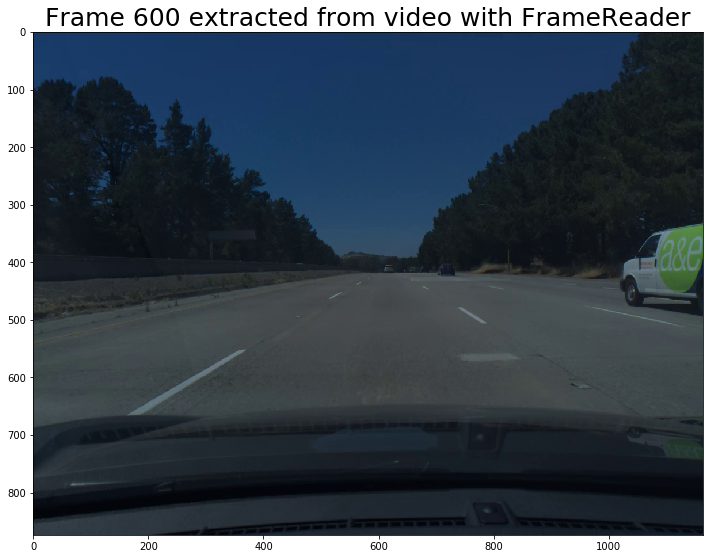

In [68]:
from openpilot_tools.lib.framereader import FrameReader
frame_index = 600

fr = FrameReader('data/27/video.hevc')
figsize(12,12)
imshow(fr.get(frame_index, pix_fmt='rgb24')[0]);
title('Frame ' + str(frame_index) + ' extracted from video with FrameReader', fontsize=25);

In [29]:
from openpilot_tools.lib.framereader import FrameReader
import cv2
fr = FrameReader('data/27/video.hevc')
for i in range(50):
    frame = fr.get(i, pix_fmt='rgb24')[0]
#     frame.tofile('data/frames/'+str(i)+'.frames')
    
#     frame = cv2.resize(frame,(512,256))
#     break
#     cv2.imwrite('data/pics/'+str(i)+'.jpg',frame)
    cv2.imwrite('data/pics/'+str(i)+'.png',cv2.cvtColor(frame,cv2.COLOR_RGB2BGR))
#     frame2 = cv2.cvtColor(frame, cv2.COLOR_BGR2YUV)
#     Y = list(frame2[:,:,0].reshape(-1))
#     U = list(frame2[:,:,1].reshape(-1))
#     V = list(frame2[:,:,2].reshape(-1))
#     total = np.array(Y + U + V).astype(np.float32).reshape(1,6,128,256)
#     total.tofile('data/raws/'+str(i)+'.raw')

---

In [41]:
from utils.img import imshow
from utils.transform import *
from utils.postprocess import *